# Ford Gobike Data Exploration
## by Jin Jin

## Investigation Overview

> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area. The goal is find out any metrics will effect in bike riders from dataset.

## Dataset Overview

> The source data (Ford GoBike System Data) is available at : https://www.fordgobike.com/system-data. Dataset used here is for 2020-01 only.

>Each trip is anonymized and includes:
Trip Duration (seconds)/
Start Time and Date/
End Time and Date/
Start Station ID/
Start Station Name/
Start Station Latitude/
Start Station Longitude/
End Station ID/
End Station Name/
End Station Latitude/
End Station Longitude/
Bike ID/
User Type (Subscriber or Customer – “Subscriber” = Member or “Customer” = Casual)

In [0]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [0]:
# load in the dataset into a pandas dataframe
df= pd.read_csv('202001-baywheels-tripdata.csv')

## Duration vs Number of Trips

> Trip duration is mostly concentrated on the lower spectrum. Most of the values are less than 2000 seconds with peak around 600 seconds. Trip duration values first increases starting from arount 8000 values at 0 to 20000 values at around 600 but then starts to fall and raching below 5000 values under 2000 sec.

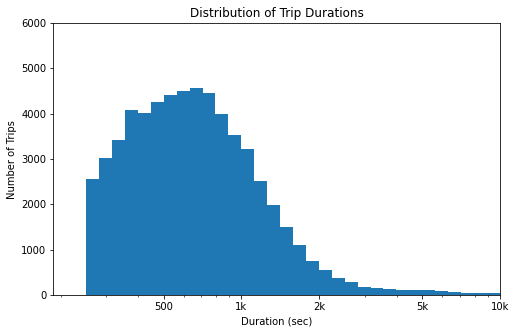

In [6]:
log_binsize = 0.05
log_bins = 10 ** np.arange(2.4, np.log10(df['duration_sec'].max()) + log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'duration_sec', bins = log_bins)
plt.title('Distribution of Trip Durations')
plt.xlabel('Duration (sec)')
plt.ylabel('Number of Trips')
plt.xscale('log')
plt.xticks([500, 1e3, 2e3, 5e3, 1e4], [500, '1k', '2k', '5k', '10k'])
plt.axis([0, 10000, 0, 6000])
plt.show()

## Relationship between user type and start station counts; and relationship between user type and end station counts

Text(0.5, 1.0, 'Start station counts Against User Type')

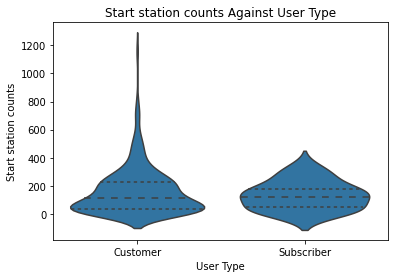

In [8]:
# plot relationship between user type and start station counts
base_color = sb.color_palette()[0]
sb.violinplot(data=df, x='user_type', y=df['start_station_id'].value_counts(), color=base_color, inner='quartile')
plt.xlabel('User Type')
plt.ylabel('Start station counts')
plt.title('Start station counts Against User Type')

Text(0.5, 1.0, 'End station counts Against User Type')

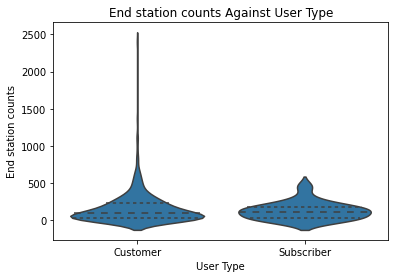

In [9]:
# plot relationship between user type and end station counts
base_color = sb.color_palette()[0]
sb.violinplot(data=df, x='user_type', y=df['end_station_id'].value_counts(), color=base_color, inner='quartile')
plt.xlabel('User Type')
plt.ylabel('End station counts')
plt.title('End station counts Against User Type')

## Relationship between user type and bike ID



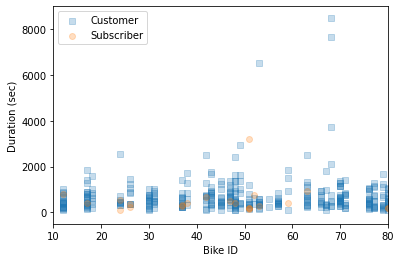

In [7]:
user_type_markers = [['Customer', 's'],['Subscriber', 'o']]

for utype, marker in user_type_markers:
    df_utype = df[df['user_type'] == utype]
    plt.scatter(df_utype['bike_id'], df_utype['duration_sec'], marker = marker, alpha=0.25)
plt.legend(['Customer','Subscriber'])
plt.axis([10, 80, -500, 9000 ])
plt.xlabel('Bike ID')
plt.ylabel('Duration (sec)')
plt.show()

jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle